In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

## Data preparation

In [2]:
index_data = pd.read_csv("./data/market_index_update.csv")  # read the prepared csv file
index_data['date'] = pd.to_datetime(index_data['date'])     # convert them to pandas date format
index_data.set_index('date', inplace=True)                  # make the date as index of the dataframe
index_data = index_data.drop('DSEX', axis=1)                # remove the DSEX column, as we will use normalize index value instead
agg_dict = {col: 'last' for col in index_data.columns}      # Create aggregation dictionary: sum 'Total Volume', take last for all other columns
agg_dict['Total Volume'] = 'sum'
monthly_index_data = index_data.resample('M').agg(agg_dict).dropna(subset=['Total Volume']).reset_index() # Perform monthly aggregation
monthly_index_data['date'] = monthly_index_data['date'].dt.to_period('M').astype(str) 
call_money_data = pd.read_excel("./data/MONTHLY AVERAGE CALL MONEY MARKET RATES (Weighted Average) (1).xlsx",sheet_name="Sheet1") #read the call money data
call_money_data['Month '] = pd.to_datetime(call_money_data['Month ']).dt.to_period('M').astype(str)
call_money_data = call_money_data.rename(columns={'Month ': 'date'})
data_sets = pd.merge(monthly_index_data, call_money_data, on='date', how='left') # merge both dataframe
data_sets = data_sets.dropna()  # drop all NaN values
data_sets['date'] = pd.to_datetime(data_sets['date'], format='%Y-%m')
data_sets.set_index('date', inplace=True)
data_sets

C:\Users\mehedi\AppData\Local\Temp\ipykernel_4888\4150427480.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_index_data = index_data.resample('M').agg(agg_dict).dropna(subset=['Total Volume']).reset_index() # Perform monthly aggregation


,DSE,Bank,Cement,Ceramics,Engineering,NBFI,Food,Fuel,Insurance,IT,...,Mutual_Fund,Paper,Pharmaceuticals,Service_Real_Estate,Tannery,Textile,Travel_Leisure,Telecommunication,Total Volume,Call Money Rate ( %)
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,1032.77,868.634,1006.070,1176.640,1046.51,974.630,1086.75,993.203,998.558,1043.450,...,950.080,1000.000,1081.52,1113.60,1038.700,1050.80,1000.00,1000.00,569083533,9.82
2009-02-01,1114.10,798.453,1015.330,1205.580,1256.48,940.101,1199.77,1003.450,1074.440,1054.550,...,911.059,1000.000,1041.34,1288.85,1019.400,1281.61,1000.00,1000.00,460763854,9.25
2009-03-01,1144.00,663.223,914.329,1189.350,1421.22,924.363,1206.82,1082.800,1210.860,1119.720,...,822.759,1000.000,1049.62,2165.60,963.362,1262.91,1000.00,1000.00,643641302,8.31
2009-04-01,1135.64,858.422,915.121,1137.230,1283.94,880.688,1261.03,1156.710,1057.130,954.605,...,754.339,1000.000,1016.42,2425.92,940.242,1143.20,1000.00,1000.00,500314714,1.95
2009-05-01,1245.34,850.361,949.602,1221.170,1449.86,1199.750,1227.78,1244.100,1282.100,1091.760,...,732.296,1000.000,1166.14,2988.07,972.393,1229.53,1000.00,1000.00,557243295,3.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,3547.65,3360.600,2479.590,627.107,1691.71,1415.760,18560.20,1932.800,3189.340,1606.260,...,540.676,135.781,4235.72,2180.96,2380.940,1605.30,1438.56,4145.42,3022667212,9.66
2024-11-01,3590.72,3277.730,2488.300,648.585,1755.26,1407.730,19047.40,2045.450,3411.950,1603.060,...,524.270,139.556,4353.37,2345.16,2431.200,1673.87,1385.85,4138.47,3520135847,9.99
2024-12-01,3592.34,3245.210,2428.950,640.612,1746.52,1314.920,19504.30,2016.010,3307.670,1543.210,...,518.790,139.050,4461.46,2366.01,2461.480,1699.37,1336.18,4263.56,2751191096,10.07


Data Preparation  
The dataset used in this study was carefully constructed by collecting and integrating data from multiple sources, with the goal of capturing both capital market dynamics and short-term liquidity conditions in Bangladesh. The key variables include sectoral index values, a normalized market-wide index (DSE), total trading volume, and the call money rate.  

Market Index and Sectoral Data   
The stock market-related data, including sectoral indices and trading volume, was collected from internal resources compiled by the LRG research team. These datasets include daily index values for 19 distinct sectors (e.g., Bank, Cement, Engineering, Pharmaceuticals, etc.) as well as the DSEX index, which represents the broader market performance.  

Notably, the DSEX index provided was normalized and rebased to 1000, consistent with how the sector indices were treated. This normalized version, referred to as “DSE” in the dataset, ensures comparability across sectors and time. The normalization was handled internally by the LRG team, using standard financial base-year re-indexing methods.  

All data were compiled into a single CSV file and read into a pandas DataFrame in Python. The date column was converted into datetime format and set as the index to facilitate time-series analysis. Since the original data was in daily frequency, it was resampled into monthly frequency for consistency with the call money rate data.  

For monthly aggregation:  

The last trading day of each month was used to represent the monthly value of each index.  

The total trading volume was aggregated using a sum to capture total investor activity for the month.  

Call Money Rate Data  
The monthly weighted average call money rate was sourced from the official website of Bangladesh Bank, available in Excel format. The dates were standardized to match the stock market dataset in YYYY-MM format, and the column was renamed for clarity. This dataset was then merged with the previously prepared market index data using a left join on the monthly date column.  

Final Dataset Structure  
After merging, all rows containing missing values were dropped to ensure a clean and consistent dataset. The final DataFrame spans 193 monthly observations from January 2009 to February 2025, and includes:    

DSE index: normalized DSEX index (rebased to 1000)  

19 sectoral indices: including Bank, Cement, Fuel, Pharmaceuticals, etc.  

Total trading volume: monthly sum of shares traded  

Call money rate (%): monthly weighted average (liquidity indicator)  

This dataset serves as the empirical foundation for the exploratory, regression, and sectoral sensitivity analyses in the following sections of the study.  

##  Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [3]:
summary_stats = data_sets.describe().transpose()
summary_stats.round(2)

,count,mean,std,min,25%,50%,75%,max
DSE,193.0,2.883310e+03,8.542600e+02,1032.77,2.248630e+03,2.784520e+03,3.515920e+03,4.647830e+03
Bank,193.0,2.123770e+03,7.150300e+02,663.22,1.433850e+03,2.148550e+03,2.896760e+03,3.634170e+03
Cement,193.0,2.376520e+03,7.222800e+02,914.33,1.773180e+03,2.485600e+03,2.926990e+03,4.147090e+03
Ceramics,193.0,9.657100e+02,2.663200e+02,532.33,7.457700e+02,9.285600e+02,1.196140e+03,1.700920e+03
Engineering,193.0,2.445750e+03,5.456700e+02,1046.51,2.077100e+03,2.442660e+03,2.773670e+03,4.334920e+03
NBFI,193.0,2.145400e+03,8.344100e+02,880.69,1.553090e+03,2.034900e+03,2.418870e+03,5.918470e+03
Food,193.0,1.389944e+04,7.573610e+03,1086.75,4.723330e+03,1.589190e+04,1.904740e+04,2.669710e+04
Fuel,193.0,2.185380e+03,4.177600e+02,993.20,1.922430e+03,2.192520e+03,2.436270e+03,3.188760e+03
Insurance,193.0,2.639200e+03,1.101430e+03,998.56,1.901230e+03,2.218690e+03,3.411950e+03,5.494770e+03
IT,193.0,1.491040e+03,4.702200e+02,758.87,1.160870e+03,1.344160e+03,1.652330e+03,2.695230e+03


Descriptive Statistics  
Table X presents the descriptive statistics for the DSEX index, 19 sectoral indices, total trading volume, and the call money rate based on 193 monthly observations from January 2009 to February 2025.  

The DSEX index, representing overall capital market performance, has a mean of 2,883 points, with values ranging from 1,033 to 4,648. This reflects considerable variability in the market over the study period, also evident in its standard deviation of 854, indicating periods of high volatility.  

Among sectors, Food recorded the highest average index value (13,899) and also the widest dispersion (standard deviation ≈ 7,574), suggesting large-scale valuation shifts in that sector. On the opposite end, Paper and Mutual Fund sectors showed relatively low average index values, 484 and 506 respectively, with narrower variability.  

The call money rate, the primary independent variable in this study, has a mean of 6.25%, a standard deviation of 3.80, and ranges between 0.72% and 33.54%. This wide range indicates multiple liquidity regimes—including severe squeezes and easy money phases—during the observation period. These fluctuations are essential to capture potential responses in market indices.  

The total trading volume, used as a proxy for investor activity, averaged around 3.03 billion shares per month, ranging from 43 million to over 14.66 billion, confirming periods of both stagnation and extreme market participation. Such dynamics support the relevance of Hypothesis 3, which investigates how short-term liquidity affects investor behavior.  

Sectoral indices such as Insurance, Telecommunication, Tannery, and Textile also showed significant dispersion, indicating varying degrees of market sensitivity. These disparities suggest that certain sectors may be more exposed to liquidity changes, supporting the rationale for testing Hypothesis 2.  

Overall, the descriptive statistics confirm the presence of sufficient variation in both dependent and independent variables, justifying further econometric analysis.  

### Trend Visualization

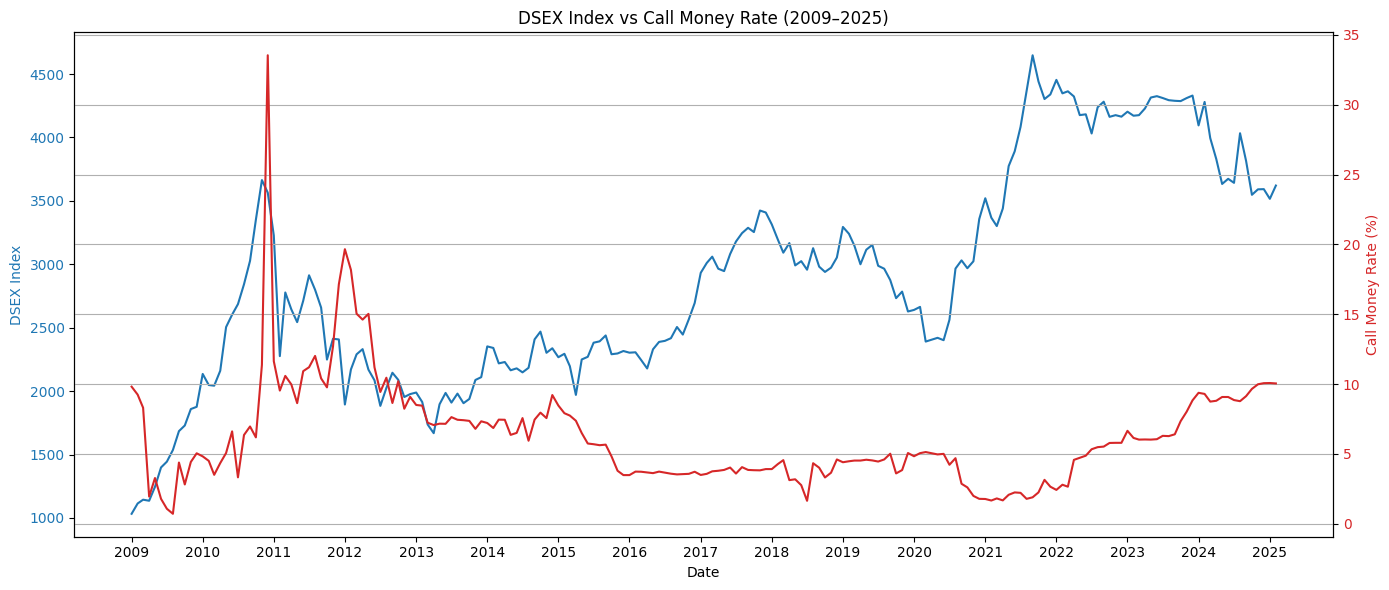

In [4]:
# Set up the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Primary y-axis: DSEX Index
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('DSEX Index', color=color)
ax1.plot(data_sets.index, data_sets['DSE'], color=color, label='DSEX Index')
ax1.tick_params(axis='y', labelcolor=color)

# Secondary y-axis: Call Money Rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Call Money Rate (%)', color=color)
ax2.plot(data_sets.index, data_sets['Call Money Rate ( %)'], color=color, label='Call Money Rate (%)')
ax2.tick_params(axis='y', labelcolor=color)

# Improve x-axis readability
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Title and layout
plt.title('DSEX Index vs Call Money Rate (2009–2025)')
fig.tight_layout()
plt.grid(True)
plt.show()


Visual Analysis: DSEX Index vs Call Money Rate (2009–2025)  
Figure X illustrates the co-movement of the DSEX Index (left y-axis, blue line) and the call money rate (right y-axis, red line) over the period from January 2009 to February 2025. The graph utilizes a dual-axis format to accommodate the differing scales of the two variables, allowing a clearer comparative visualization.  

The DSEX index shows multiple cyclical trends throughout the sample period. Notably, the index surged between 2009 and 2010, reaching a significant peak in early 2011, followed by a sharp correction. Interestingly, this peak coincides with a sudden and extreme spike in the call money rate, which touched over 30%, suggesting a possible liquidity shock that may have contributed to the market downturn.  

In subsequent years, the call money rate stabilized at relatively lower levels, especially between 2015 and 2020, during which the DSEX index exhibited a more gradual upward trend. However, from 2021 onward, the DSEX experienced strong growth followed by volatility, while the call money rate began climbing again after years of relative stability.  

This inverse pattern—where periods of high call money rates often align with or precede corrections in the DSEX index—supports the theoretical expectation that tighter liquidity conditions may exert downward pressure on stock prices. It sets the stage for a more formal regression analysis to empirically test the direction and significance of this relationship.  

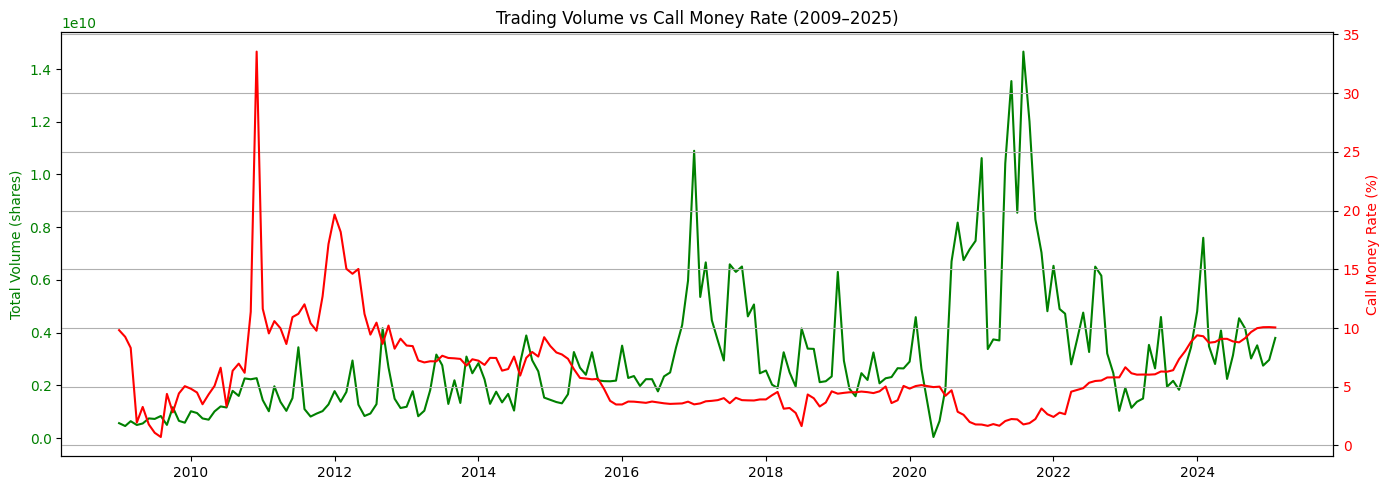

In [5]:
fig, ax1 = plt.subplots(figsize=(14, 5))

# Primary Y-axis for Volume
ax1.set_ylabel('Total Volume (shares)', color='green')
ax1.plot(data_sets.index, data_sets['Total Volume'], color='green', label='Total Volume')
ax1.tick_params(axis='y', labelcolor='green')

# Secondary Y-axis for Call Money Rate
ax2 = ax1.twinx()
ax2.set_ylabel('Call Money Rate (%)', color='red')
ax2.plot(data_sets.index, data_sets['Call Money Rate ( %)'], color='red', label='Call Money Rate (%)')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Trading Volume vs Call Money Rate (2009–2025)')
fig.tight_layout()
plt.grid()
plt.show()


Figure X illustrates the movement of total monthly trading volume alongside the call money rate. A preliminary visual inspection suggests periods of inverse movement, where spikes in the call money rate correspond to reduced trading activity, indicating possible investor caution under tight liquidity conditions. This supports the investigation under Hypothesis H3.

### Sector Comparison

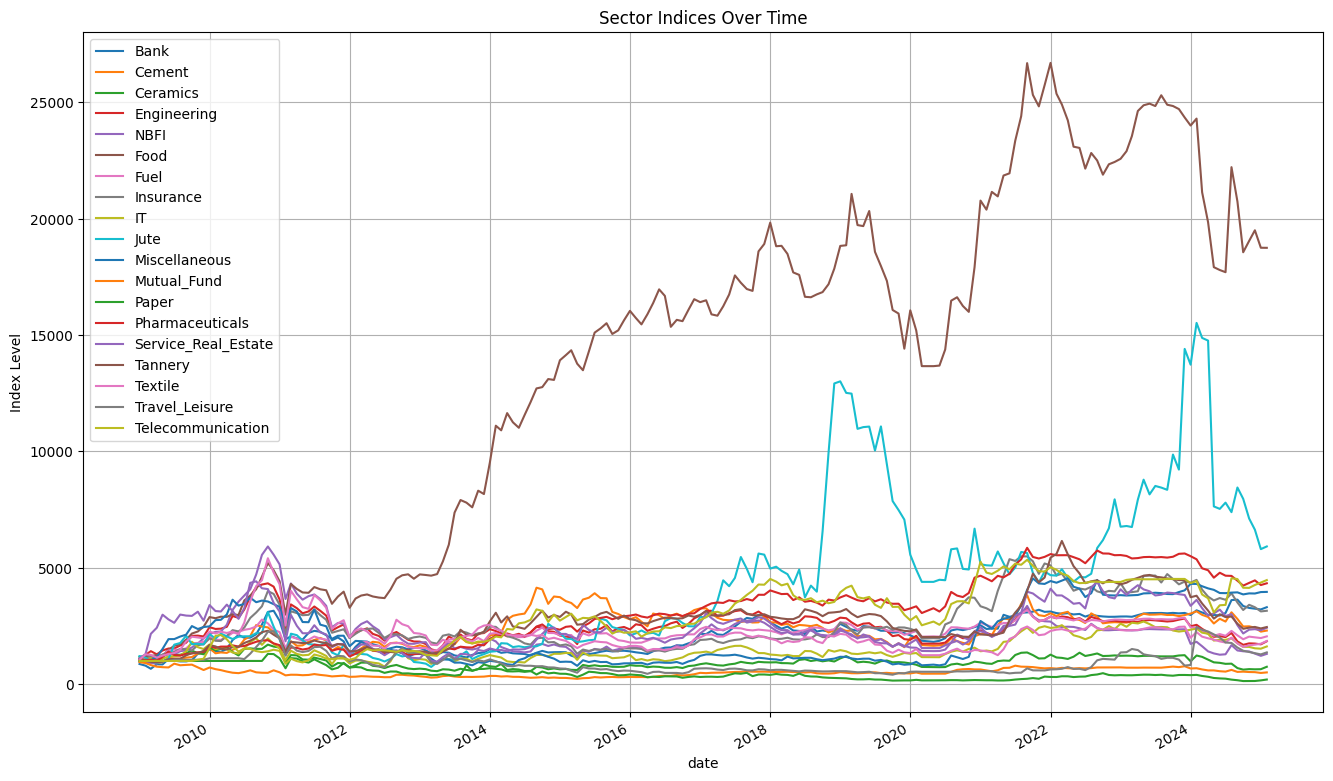

In [6]:
sectors = ['Bank', 'Cement', 'Ceramics', 'Engineering', 'NBFI', 'Food',
       'Fuel', 'Insurance', 'IT', 'Jute', 'Miscellaneous', 'Mutual_Fund',
       'Paper', 'Pharmaceuticals', 'Service_Real_Estate', 'Tannery', 'Textile',
       'Travel_Leisure', 'Telecommunication']

data_sets[sectors].plot(figsize=(16, 10), title='Sector Indices Over Time')
plt.ylabel('Index Level')
plt.grid()
plt.show()

Figure X displays the performance of 19 sector indices rebased to 1000, as constructed by the LRG research team, over the period 2009–2025. The chart provides a high-level overview of relative index movements across sectors. While certain sectors—such as Food, Jute, and Tannery—show exceptional long-term growth, others exhibit more moderate behavior. However, due to the high number of lines and some overlaps, the chart becomes visually dense.

In [7]:
correlation = data_sets[sectors + ['Call Money Rate ( %)']].corr()['Call Money Rate ( %)'].drop('Call Money Rate ( %)')
correlation = correlation.sort_values()
correlation

Food                  -0.390931
Telecommunication     -0.389184
Pharmaceuticals       -0.338814
Fuel                  -0.313968
Mutual_Fund           -0.275975
Tannery               -0.254355
Cement                -0.177111
Jute                  -0.153091
Service_Real_Estate   -0.144401
IT                    -0.122726
Ceramics              -0.065379
Bank                   0.010812
Insurance              0.026850
Engineering            0.035456
Miscellaneous          0.129501
NBFI                   0.255777
Paper                  0.376560
Textile                0.475744
Travel_Leisure         0.586170
Name: Call Money Rate ( %), dtype: float64

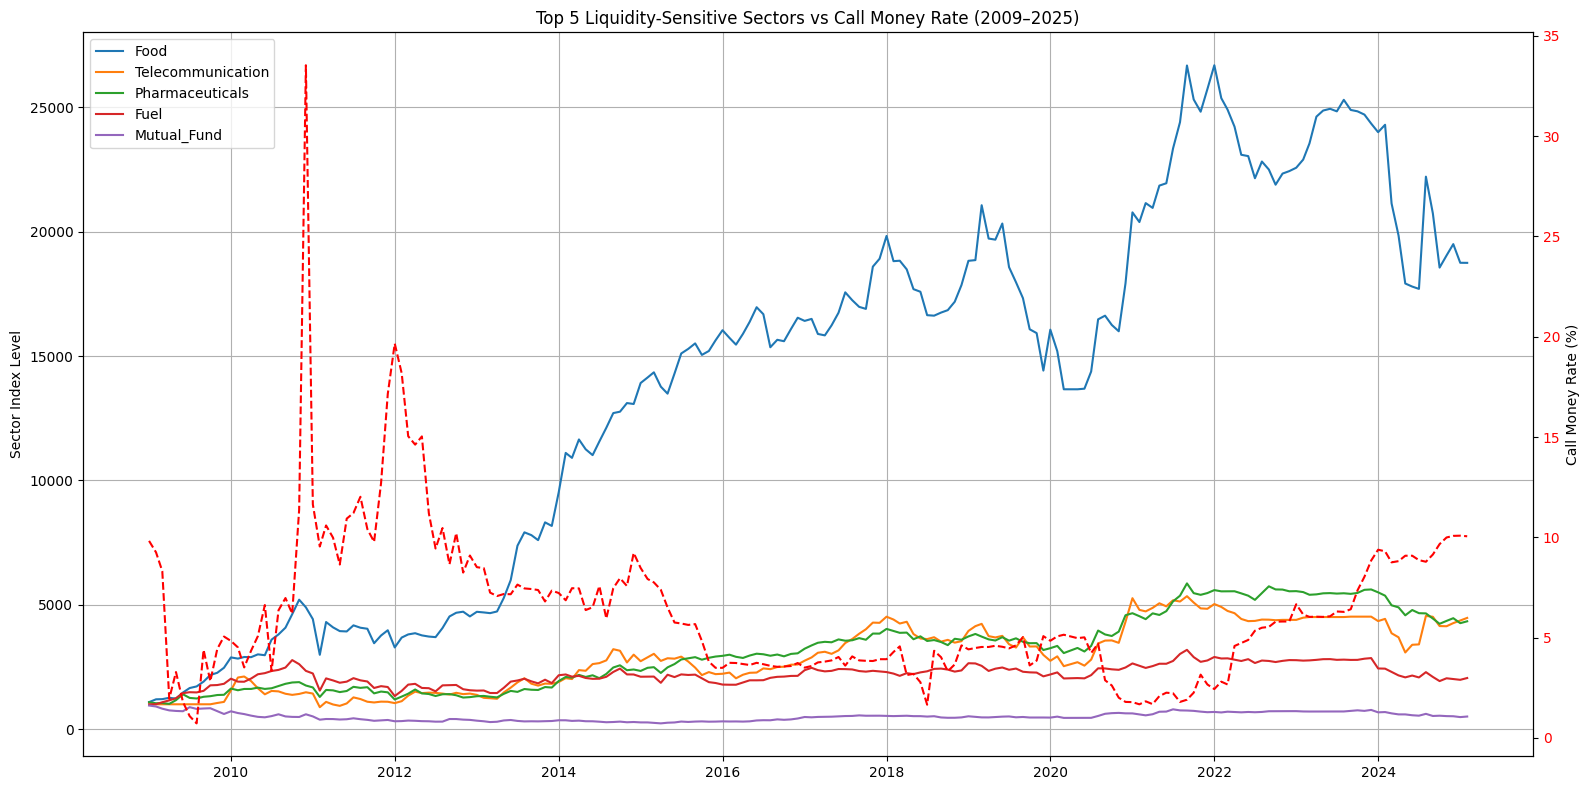

In [8]:
top_sensitive = ['Food', 'Telecommunication', 'Pharmaceuticals', 'Fuel', 'Mutual_Fund']

fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot top 5 sensitive sectors
for sector in top_sensitive:
    ax1.plot(data_sets.index, data_sets[sector], label=sector)

ax1.set_ylabel('Sector Index Level')
ax1.set_title('Top 5 Liquidity-Sensitive Sectors vs Call Money Rate (2009–2025)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Secondary axis for Call Money Rate
ax2 = ax1.twinx()
ax2.plot(data_sets.index, data_sets['Call Money Rate ( %)'], color='red', linestyle='--', label='Call Money Rate (%)')
ax2.set_ylabel('Call Money Rate (%)')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()


Figure X presents the five sectors most negatively correlated with the call money rate: Food, Telecommunication, Pharmaceuticals, Fuel, and Mutual Funds. These sectors exhibited substantial downward movement during periods of rising short-term borrowing costs, as indicated by the red dashed line representing the call money rate (right axis).  

The Food sector, in particular, showed the strongest negative correlation (-0.39), suggesting that tight liquidity conditions may significantly influence investor sentiment or financial performance in this segment. Similarly, Telecommunications and Pharmaceuticals demonstrated moderate sensitivity.  

This dual-axis visualization offers early evidence supporting Hypothesis 2, indicating that capital market responses to monetary tightening are not uniform and that sector-level heterogeneity is a crucial dimension to investigate further through econometric analysis.  

### Correlation Matrix

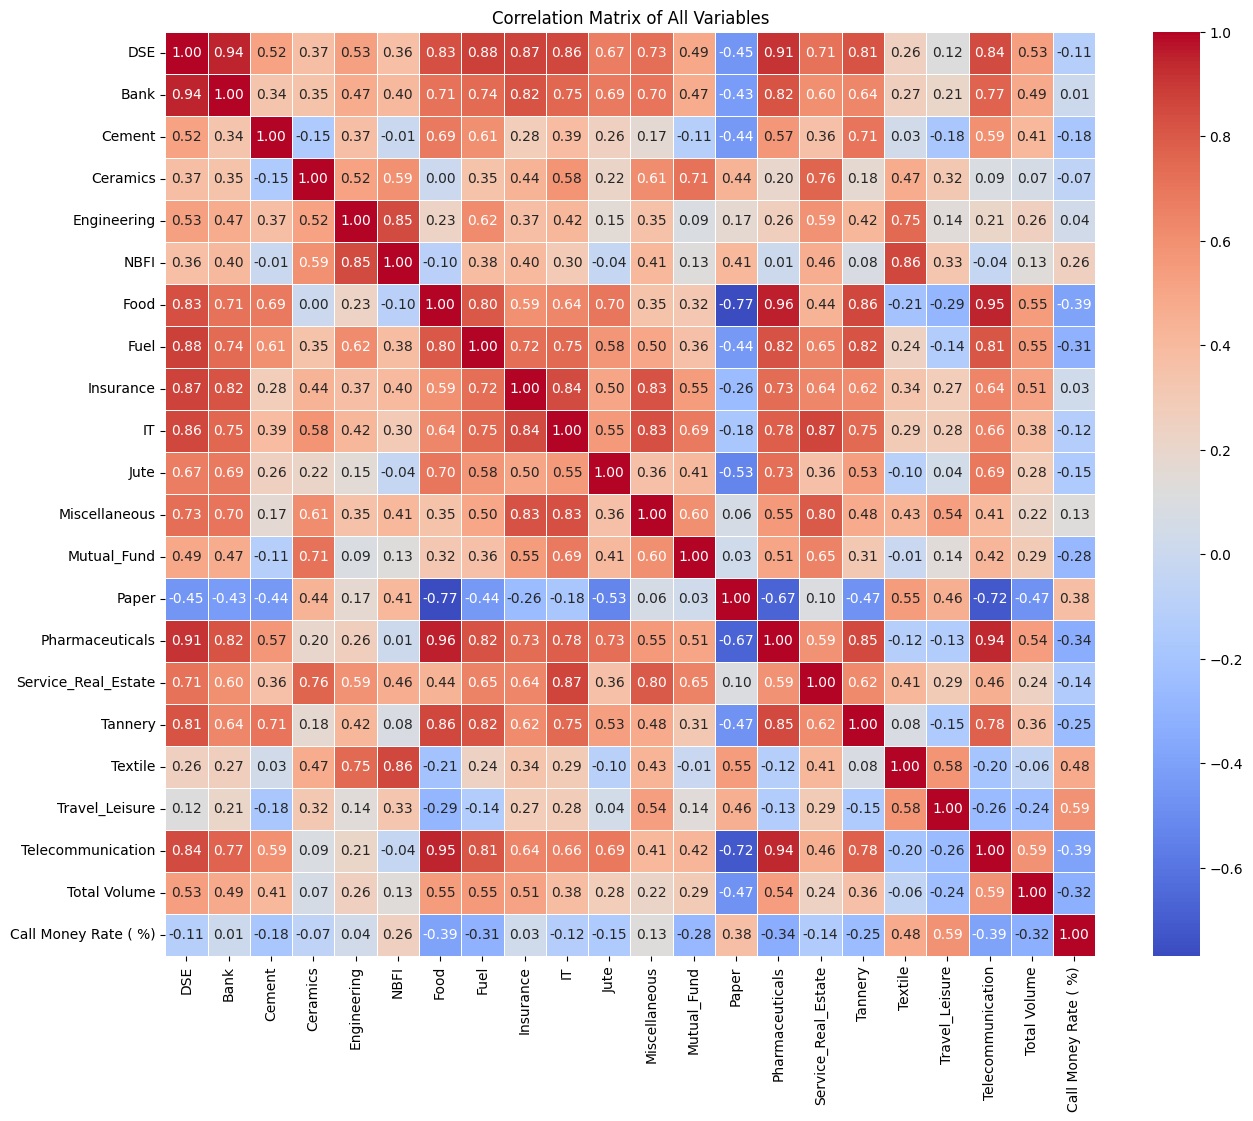

In [9]:
corr = data_sets.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Variables')
plt.show()


Correlation Analysis  
Table X and Figure Y present the correlation matrix between the DSEX index, sectoral indices, total trading volume, and the call money rate for the period January 2009 to February 2025. The goal of this analysis is to understand the strength and direction of linear relationships between liquidity conditions (proxied by the call money rate) and capital market variables.  

The DSEX index shows a mildly negative correlation with the call money rate (-0.11), suggesting that market-wide performance tends to decline during tight liquidity periods, although the relationship is not particularly strong. In contrast, sectoral indices exhibit varying levels of sensitivity, both in magnitude and direction.  

Notably, the following sectors display the strongest negative correlation with the call money rate:  

Food: -0.39  

Telecommunication: -0.39  

Pharmaceuticals: -0.34  

Fuel: -0.31  

Mutual Fund: -0.28  

These findings support the idea that certain sectors are more liquidity-sensitive, likely due to their capital-intensive nature or high dependence on investor sentiment. Conversely, a few sectors such as Textile (0.48) and Travel & Leisure (0.59) exhibit positive correlations, which may imply either delayed market response or structural resilience to liquidity changes.  

Furthermore, total trading volume is negatively correlated with the call money rate (-0.32), reinforcing the interpretation that liquidity tightening discourages market participation.  

This correlation structure validates Hypothesis 2 and partially supports Hypothesis 3, motivating the next phase of regression analysis to establish causality and statistical significance.      
((Table X = the top 5 positively/negatively correlated sectors with the call money rate — the summary table I suggested below that paragraph.

Figure Y = the heatmap of the full correlation matrix (which you can put in the appendix or body).))

## Data Analysis (Inferential Analysis)

###  Stationarity Check

In [ ]:


# Variables to test
variables_to_test = ['DSE', 'Bank', 'Cement', 'Ceramics', 'Engineering', 'NBFI', 'Food',
       'Fuel', 'Insurance', 'IT', 'Jute', 'Miscellaneous', 'Mutual_Fund',
       'Paper', 'Pharmaceuticals', 'Service_Real_Estate', 'Tannery', 'Textile',
       'Travel_Leisure', 'Telecommunication', 'Total Volume',
       'Call Money Rate ( %)']
print("ADF Test Results:")
for var in variables_to_test:
    result = adfuller(data_sets[var].dropna())
    print(f"{var}: ADF Stat = {result[0]:.4f}, p-value = {result[1]:.4f}")


ADF Test Results:
DSE: ADF Stat = -2.0941, p-value = 0.2469
Bank: ADF Stat = -1.4239, p-value = 0.5708
Cement: ADF Stat = -2.4752, p-value = 0.1216
Ceramics: ADF Stat = -2.6381, p-value = 0.0854
Engineering: ADF Stat = -3.3989, p-value = 0.0110
NBFI: ADF Stat = -3.4029, p-value = 0.0109
Food: ADF Stat = -1.5739, p-value = 0.4967
Fuel: ADF Stat = -3.2280, p-value = 0.0184
Insurance: ADF Stat = -1.8918, p-value = 0.3359
IT: ADF Stat = -1.7411, p-value = 0.4101
Jute: ADF Stat = -1.0049, p-value = 0.7515
Miscellaneous: ADF Stat = -1.6175, p-value = 0.4740
Mutual_Fund: ADF Stat = -2.7921, p-value = 0.0594
Paper: ADF Stat = -1.6663, p-value = 0.4486
Pharmaceuticals: ADF Stat = -1.1944, p-value = 0.6760
Service_Real_Estate: ADF Stat = -2.5655, p-value = 0.1003
Tannery: ADF Stat = -2.2013, p-value = 0.2058
Textile: ADF Stat = -3.0053, p-value = 0.0344
Travel_Leisure: ADF Stat = -2.6504, p-value = 0.0830
Telecommunication: ADF Stat = -1.3647, p-value = 0.5991
Total Volume: ADF Stat = -2.7117, p

so we have found Stationary:  
Engineering, NBFI, Fuel, Textile, Call Money Rate (%)  
rest of them need further treatment

In [19]:
# Variables that require differencing (non-stationary)
non_stationary_vars = ['DSE', 'Bank', 'Cement', 'Ceramics', 'Food', 'Insurance',
                       'IT', 'Jute', 'Miscellaneous', 'Mutual_Fund', 'Paper',
                       'Pharmaceuticals', 'Service_Real_Estate', 'Tannery',
                       'Travel_Leisure', 'Telecommunication', 'Total Volume']

# First difference
diff_df = data_sets[non_stationary_vars].diff().dropna()
diff_df.columns = [f"Δ{col}" for col in diff_df.columns]

# Align call money rate (stationary, no diff needed)
call_money_aligned = data_sets['Call Money Rate ( %)'].loc[diff_df.index]



#  Run Regression for Differenced Variables (ΔY ~ CallMoney)
diff_results = []

for col in diff_df.columns:
    y = diff_df[col]
    X = sm.add_constant(call_money_aligned)
    model = sm.OLS(y, X).fit()

    diff_results.append({
        'Variable': col.replace('Δ', ''),
        'Beta': model.params['Call Money Rate ( %)'],
        'p-value': model.pvalues['Call Money Rate ( %)'],
        'R-squared': model.rsquared
    })

results_diff_df = pd.DataFrame(diff_results)


# Run Regression for Stationary Variables (Y ~ CallMoney)
stationary_vars = ['Engineering', 'NBFI', 'Fuel', 'Textile']

stationary_results = []

for var in stationary_vars:
    y = data_sets[var].dropna()
    call_money_y = data_sets['Call Money Rate ( %)'].loc[y.index]
    X = sm.add_constant(call_money_y)

    model = sm.OLS(y, X).fit()

    stationary_results.append({
        'Variable': var,
        'Beta': model.params['Call Money Rate ( %)'],
        'p-value': model.pvalues['Call Money Rate ( %)'],
        'R-squared': model.rsquared
    })

results_stationary_df = pd.DataFrame(stationary_results)



# Combine All Results for Final Summary
final_results = pd.concat([results_diff_df, results_stationary_df], ignore_index=True)
final_results = final_results.sort_values('p-value')  # Optional: sort by significance
print(final_results.round(4))



               Variable          Beta  p-value  R-squared
20              Textile  8.098270e+01   0.0000     0.2263
19                 Fuel -3.454200e+01   0.0000     0.0986
18                 NBFI  5.620610e+01   0.0003     0.0654
8         Miscellaneous -1.371330e+01   0.0006     0.0605
12  Service_Real_Estate -1.440810e+01   0.0075     0.0371
13              Tannery -1.045770e+01   0.0089     0.0354
0                   DSE -7.829600e+00   0.0122     0.0326
11      Pharmaceuticals -7.010200e+00   0.0160     0.0301
6                    IT -6.342900e+00   0.0200     0.0281
3              Ceramics -3.608100e+00   0.0595     0.0186
5             Insurance -8.804100e+00   0.0631     0.0181
1                  Bank -4.465700e+00   0.1257     0.0123
4                  Food -2.128580e+01   0.1847     0.0092
2                Cement -4.185400e+00   0.2938     0.0058
7                  Jute -1.644710e+01   0.3473     0.0047
10                Paper -1.077900e+00   0.4942     0.0025
17          En